In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [60]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
from IPython.display import Image
from scipy.signal import convolve2d
import pylab as pl

# **Origin images**

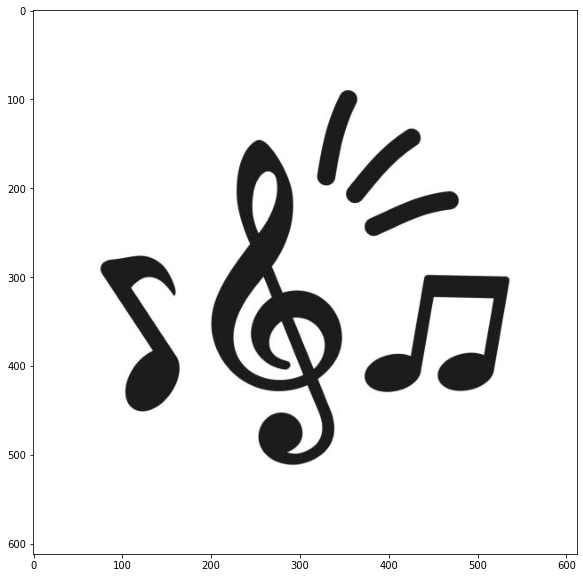

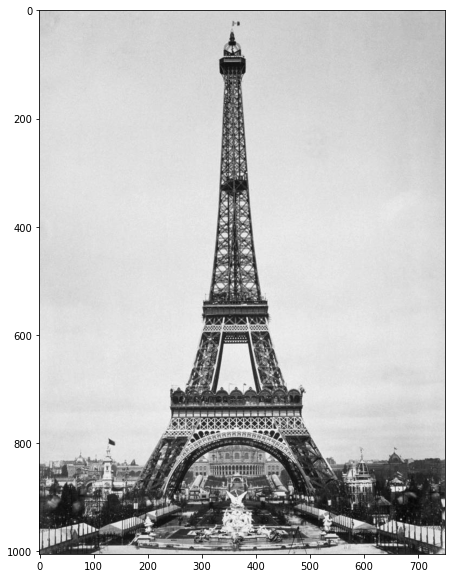

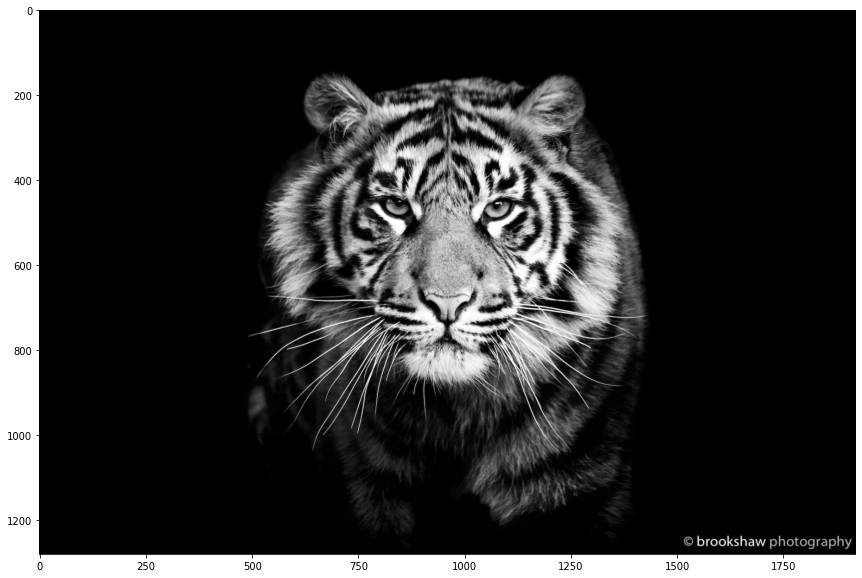

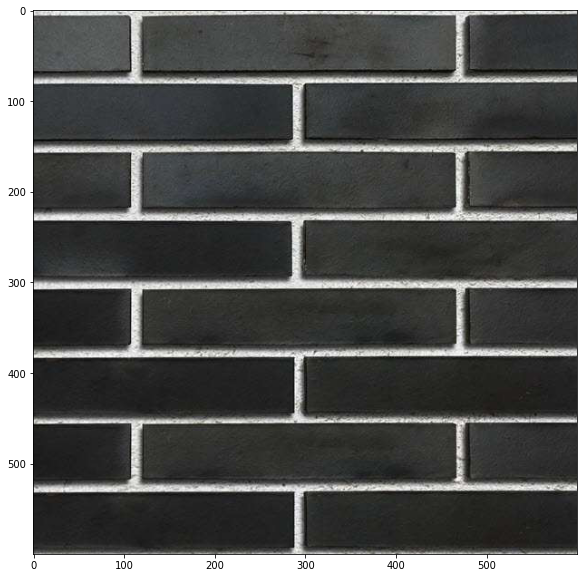

In [10]:
from PIL import Image
import glob
images = ['notes.png', 'tower.png', 'tiger.png', 'cegla.png']
image_list = []
for filename in images:
    im=Image.open(filename)
    image_list.append(im)

for i in range(4):
    plt.figure(figsize=(20,10))
    plt.imshow(image_list[i], cmap='gray')

# **Sobel**

In [66]:
def sobel_edge_detection_(image, verbose=False):
    fig = plt.figure(figsize=(25, 15))

    ax0 = fig.add_subplot(2,2,1) 
    
    if verbose:
      ax0.imshow(image, cmap='gray')
      ax0.set_title("Origin")


    filter_x = pl.array([ [ - 1 , 0 ,  1 ], [ - 2 , 0 ,  2 ], [ - 1 , 0 ,  1 ] ])
    filter_y = pl.array([ [ - 1 , - 2 , - 1 ],[ 0 ,   0 ,   0 ], [  1 ,  2 ,  1 ] ])

    new_image_x = convolve2d(image, filter_x, mode='valid')

    ax1 = fig.add_subplot(2,2,2) 
    if verbose:
        ax1.imshow(new_image_x, cmap='gray')
        ax1.set_title("Horizontal Edge")

    new_image_y = convolve2d(image, filter_y, mode='valid')

    ax2 = fig.add_subplot(2,2,3) 
    if verbose:
        ax2.imshow(new_image_y, cmap='gray')
        ax2.set_title("Vertical Edge")

    gradient_magnitude = pl.sqrt(pl.square(new_image_x) + pl.square(new_image_y))

    gradient_magnitude *= 255.0 / gradient_magnitude.max()

    ax3 = fig.add_subplot(2,2,4) 
    if verbose:
        ax3.imshow(gradient_magnitude, cmap='gray')
        ax3.set_title("Sobel")
        plt.show()

    return gradient_magnitude

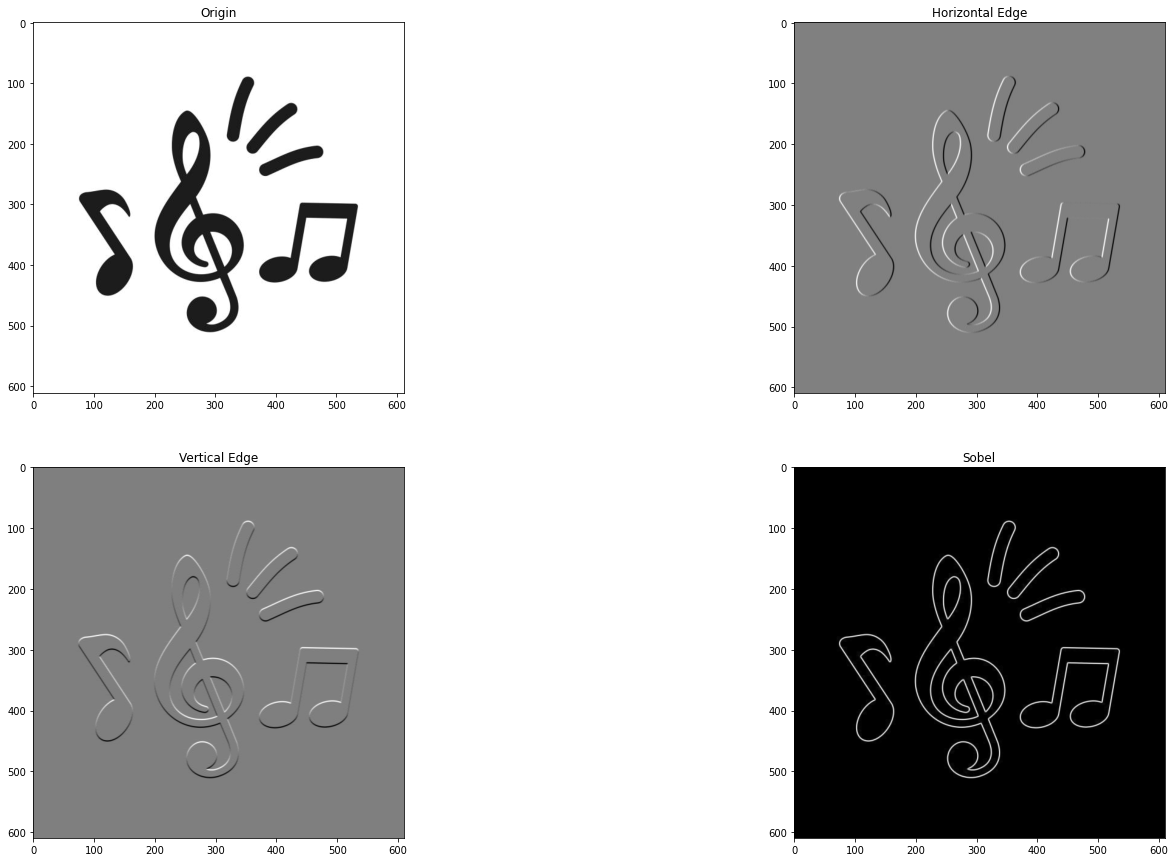

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
image = cv2.imread('notes.png', 0)
sobel_edge_detection_(image, verbose=True)

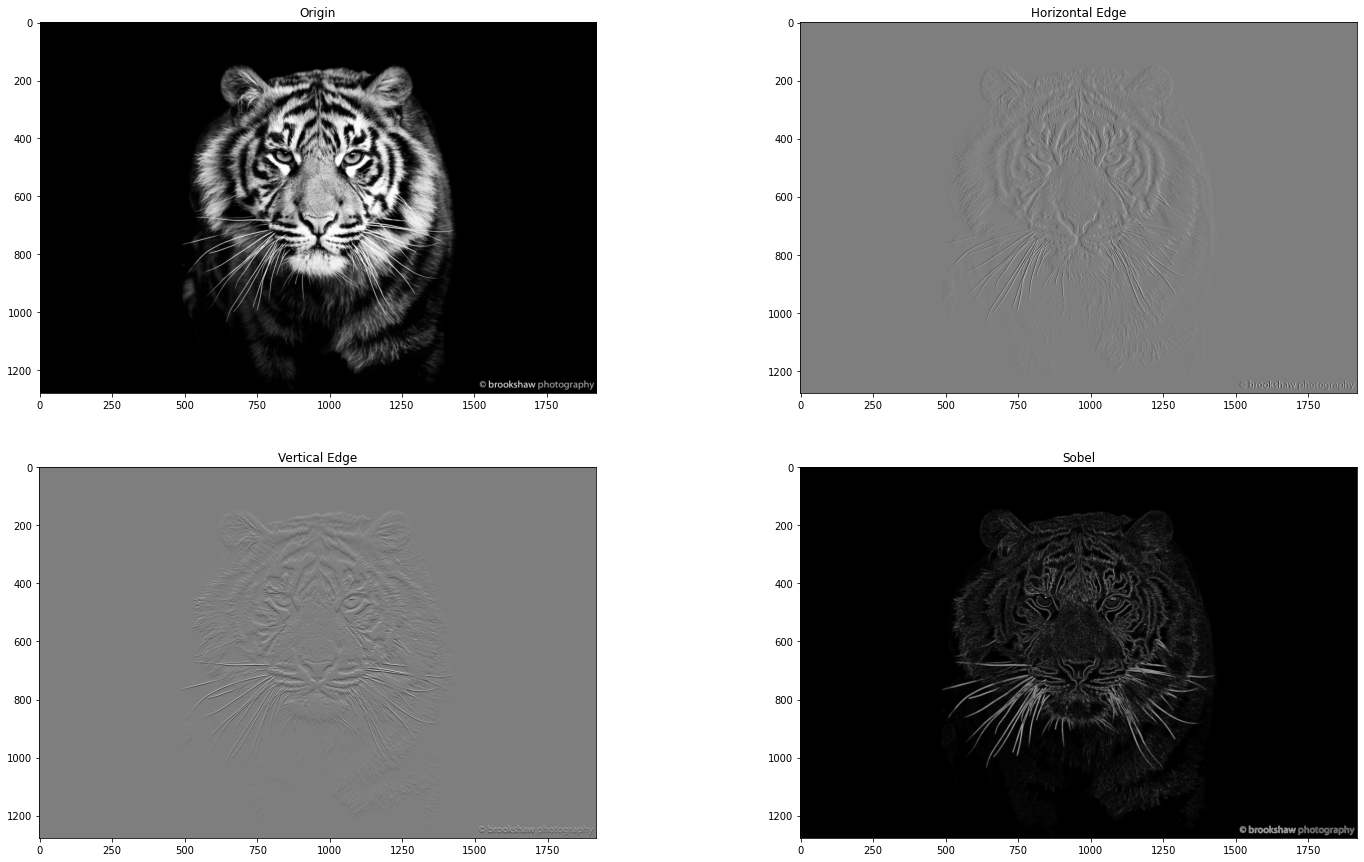

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
image2 = cv2.imread('tiger.png', 0)
sobel_edge_detection_(image2, verbose=True)

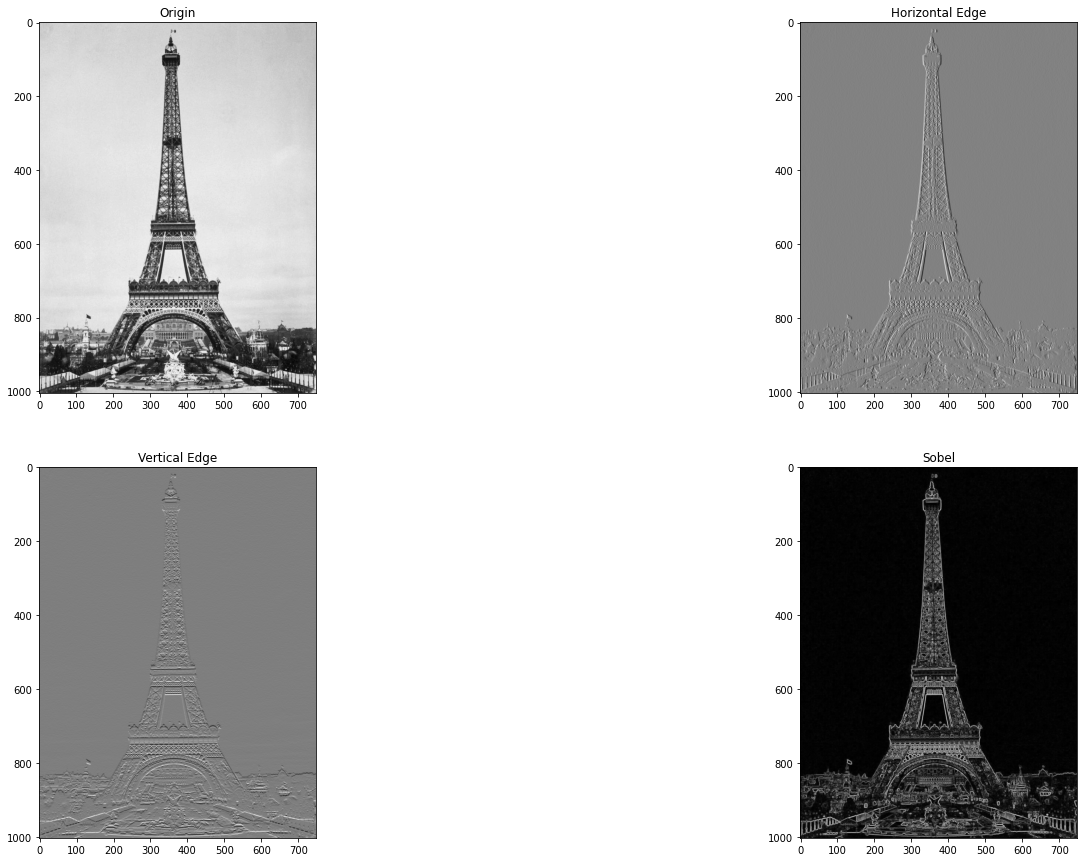

array([[ 2.15796597,  3.11226278,  3.47961556, ...,  5.45927005,
         8.14328408,  9.58292405],
       [ 2.32420047,  1.77950432,  1.77950432, ...,  6.01139757,
         0.61036495,  1.93014344],
       [ 2.44145979,  1.55613139,  0.61036495, ...,  7.23482027,
         4.27255463,  7.53745108],
       ...,
       [30.52435039, 50.59958543, 13.83793046, ..., 22.8785105 ,
        21.16567518, 23.80032002],
       [44.77350364, 50.17073632,  9.85129781, ..., 27.19379629,
        35.10792435, 33.08662216],
       [38.84338738, 37.41193593, 17.70058346, ..., 22.84184294,
        31.42045873, 33.0105317 ]])

In [64]:
image3 = cv2.imread('tower.png', 0)
sobel_edge_detection_(image3, verbose=True)

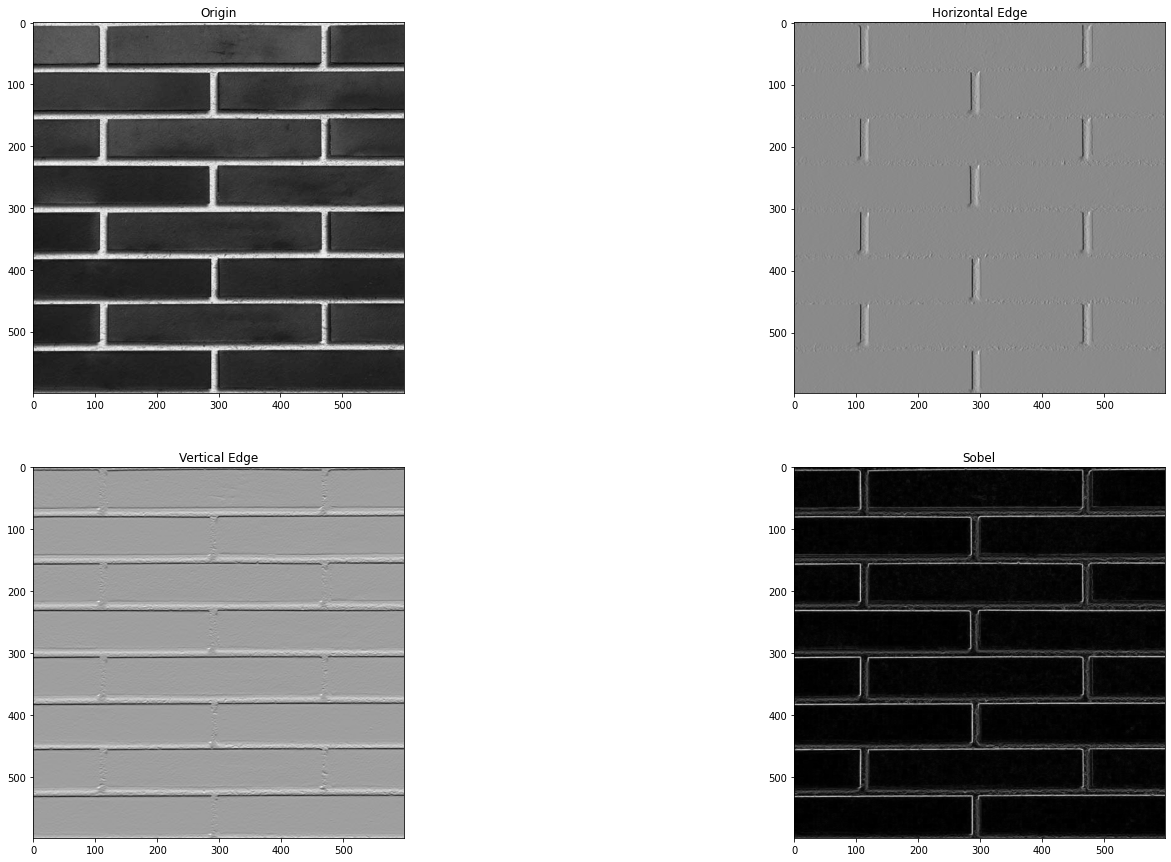

array([[ 12.09943958,  36.6224831 ,  32.29406659, ...,  21.73392633,
         17.6292438 ,  18.68696105],
       [ 20.69241418,  43.49410835,  37.10341971, ...,   7.47478442,
         13.52013627,  18.676177  ],
       [ 16.86213009,  34.9408888 ,  38.15809445, ..., 114.02344849,
        113.06175713, 109.0477879 ],
       ...,
       [ 29.29331019,  31.91756849,  33.76406221, ...,  51.34011523,
         51.24060864,  50.79438294],
       [ 28.29274832,  29.80240194,  30.3715635 , ...,  55.45628614,
         48.82462891,  54.25906196],
       [ 60.39832354,  59.83420103,  60.02357684, ...,  59.55182734,
         47.20645368,  58.90441321]])

In [65]:
image4 = cv2.imread('cegla.png', 0)
sobel_edge_detection_(image4, verbose=True)

# **Prewitt**

In [7]:
def prewitt(img):
    im=Image.open(img)
    img = cv2.imread(img, 0)

    height = img.shape[0]
    width = img.shape[1]

    Hx = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]])

    Hy = np.array([[-1, -1, -1],
                   [0, 0, 0],
                   [1, 1, 1]])

    img_x = convolve(img, Hx) / 6.0
    img_y = convolve(img, Hy) / 6.0

    img_out = np.sqrt(np.power(img_x, 2) + np.power(img_y, 2))

    img_out = (img_out / np.max(img_out)) * 255
    fig = plt.figure(figsize=(30,20))
    ax1 = fig.add_subplot(2,2,1) 
    ax1.imshow(im, cmap='gray')
    ax1.set_title("Origin")
    ax2 = fig.add_subplot(2,2,2) 
    ax2.imshow(img_out, cmap='gray')
    ax2.set_title("Prewitt")
    plt.xticks([]), plt.yticks([])
    plt.show()

def convolve_np(X, F):
    X_height = X.shape[0]
    X_width = X.shape[1]

    F_height = F.shape[0]
    F_width = F.shape[1]

    H = int((F_height - 1) / 2)
    W = int((F_width - 1) / 2)

    out = np.zeros((X_height, X_width))

    for i in np.arange(H, X_height - H):
        for j in np.arange(W, X_width - W):
            sum = 0
            for k in np.arange(-H, H + 1):
                for l in np.arange(-W, W + 1):
                    a = X[i + k, j + l]
                    w = F[H + k, W + l]
                    sum += (w * a)
            out[i, j] = sum
    return out

In [74]:
def prewitt_edge_detection_(image, verbose=False):
    fig = plt.figure(figsize=(25, 15))

    ax0 = fig.add_subplot(2,2,1) 
    
    if verbose:
      ax0.imshow(image, cmap='gray')
      ax0.set_title("Origin")

    mask_x = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])
    mask_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

    new_image_x = convolve2d(image, mask_x) 
    ax1 = fig.add_subplot(2,2,2) 
    if verbose:
        ax1.imshow(new_image_x, cmap='gray')
        ax1.set_title("Horizontal Edge")
        
    new_image_y = convolve2d(image, mask_y) 
    ax2 = fig.add_subplot(2,2,3) 
    if verbose:
        ax2.imshow(new_image_y, cmap='gray')
        ax2.set_title("Vertical Edge")

    img_out = pl.sqrt(pl.square(new_image_x) + pl.square(new_image_y))
    img_out *= 255.0 / img_out.max()
    
    ax3 = fig.add_subplot(2,2,4) 
    if verbose:
        ax3.imshow(img_out, cmap='gray')
        ax3.set_title("Prewitt")
        plt.show()
    return img_out


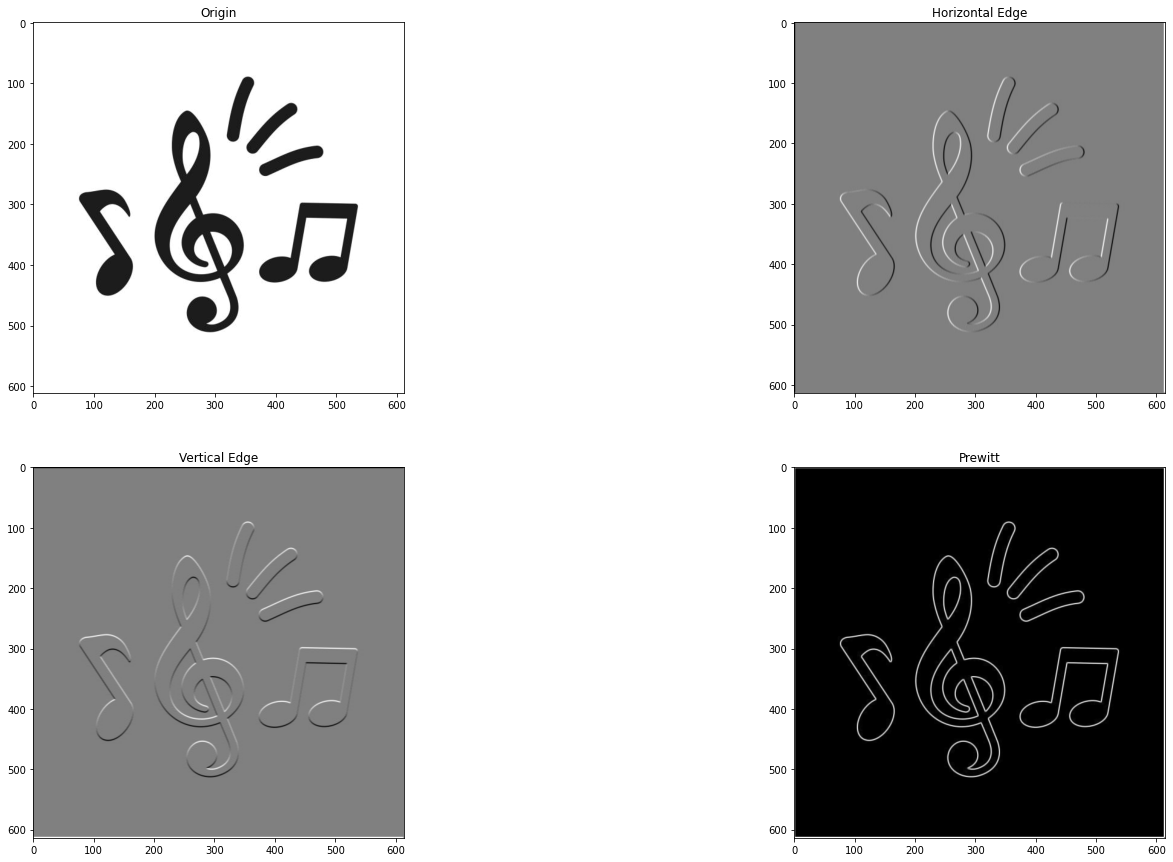

array([[120.2081528 , 190.06577809, 255.        , ..., 255.        ,
        190.06577809, 120.2081528 ],
       [190.06577809, 240.4163056 , 255.        , ..., 255.        ,
        240.4163056 , 190.06577809],
       [255.        , 255.        ,   0.        , ...,   0.        ,
        255.        , 255.        ],
       ...,
       [255.        , 255.        ,   0.        , ...,   0.        ,
        255.        , 255.        ],
       [190.06577809, 240.4163056 , 255.        , ..., 255.        ,
        240.4163056 , 190.06577809],
       [120.2081528 , 190.06577809, 255.        , ..., 255.        ,
        190.06577809, 120.2081528 ]])

In [75]:
img = cv2.imread('notes.png', 0)
prewitt_edge_detection_(img,  verbose=True)

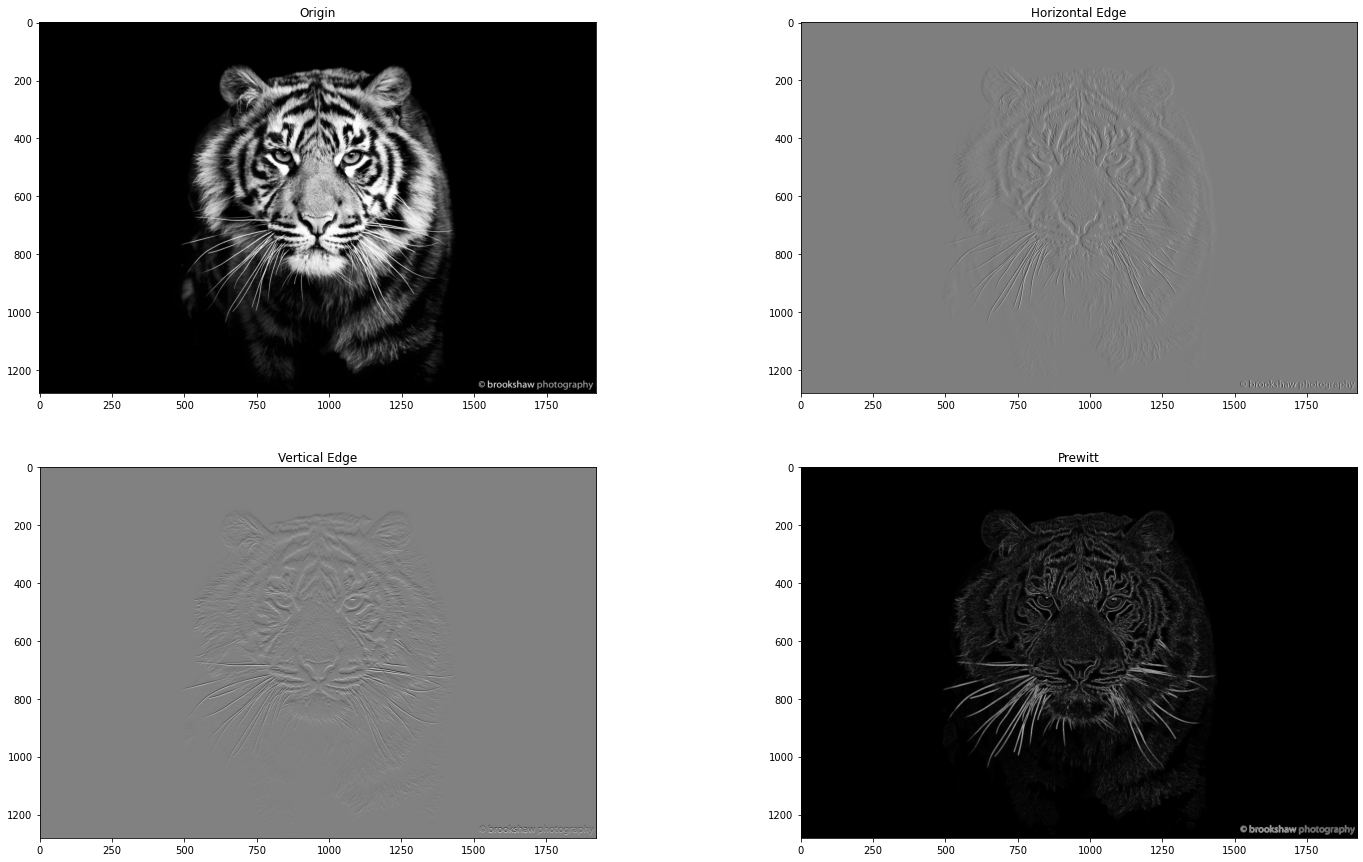

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [77]:
img1 = cv2.imread('tiger.png', 0)
prewitt_edge_detection_(img1,  verbose=True)

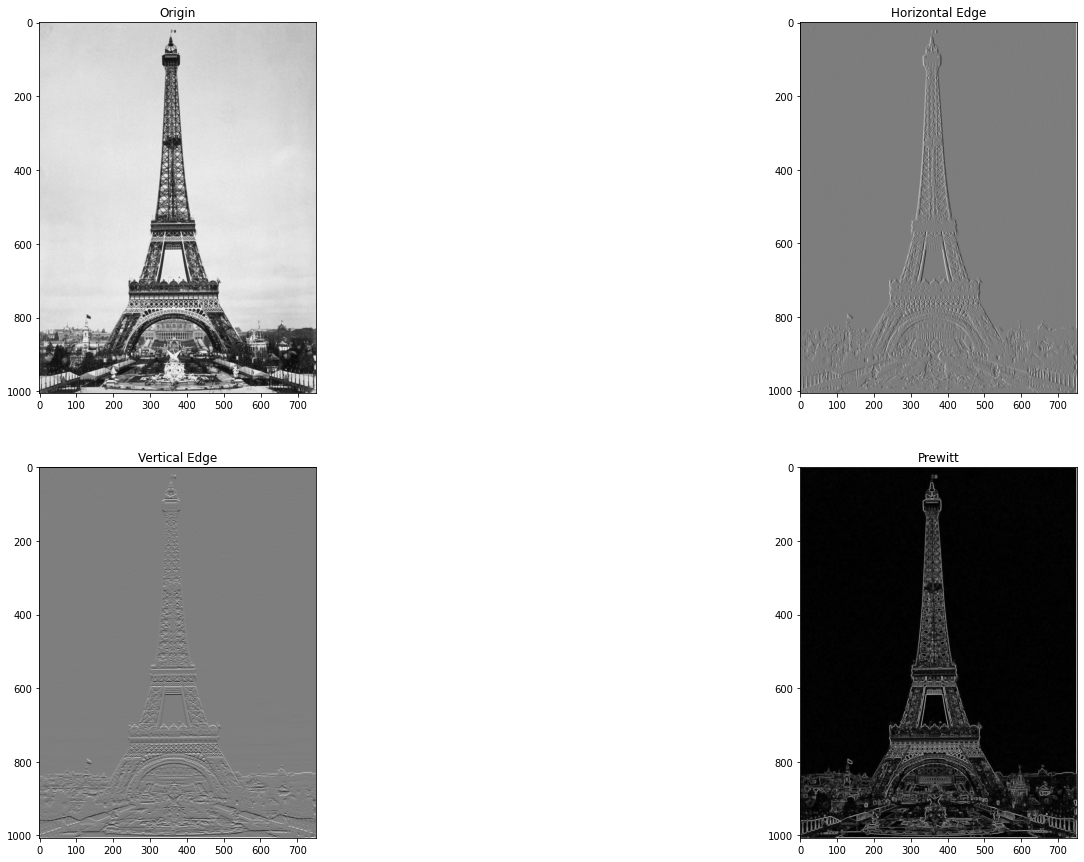

array([[ 97.31692047, 154.34028518, 207.4894599 , ..., 196.66101153,
        146.0608226 ,  92.37697526],
       [154.34028518, 195.62182997, 207.84023246, ..., 202.60069765,
        189.20570523, 148.87563921],
       [207.4894599 , 207.84023246,   1.97597808, ...,   8.15465111,
        200.92919686, 200.8708919 ],
       ...,
       [ 79.70399129,  77.02592823,  32.75485416, ...,  27.67471759,
        194.33426726, 192.62144315],
       [ 61.70483949,  76.3321445 ,  96.04986362, ..., 191.7694744 ,
        177.86272526, 139.82095807],
       [ 39.02556709,  59.36675616,  89.81467056, ..., 180.5916544 ,
        134.18886276,  85.46105198]])

In [78]:
img2 = cv2.imread('tower.png', 0)
prewitt_edge_detection_(img2,  verbose=True)

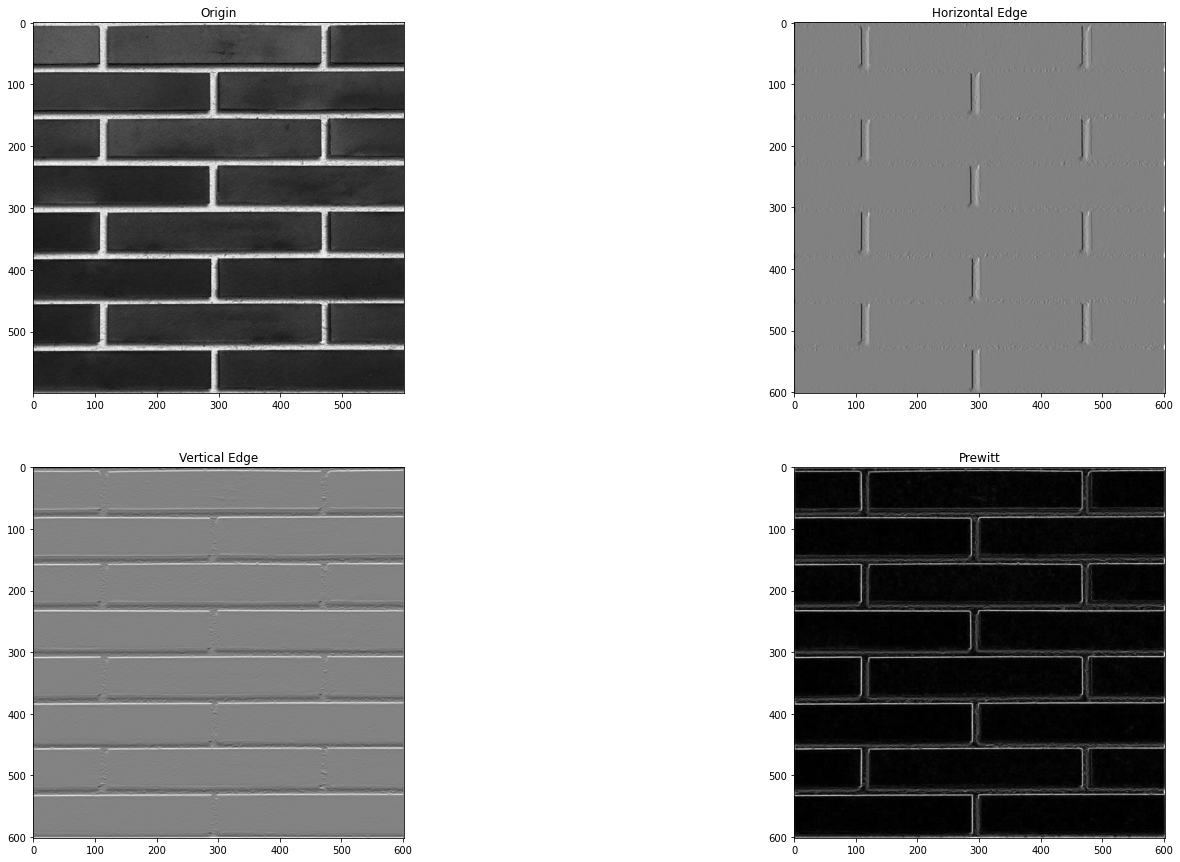

array([[111.83454758, 179.11410978, 236.90487108, ..., 236.95121164,
        174.39123106, 107.97818387],
       [177.28331974, 228.49158373, 240.31332203, ..., 224.42128612,
        213.82642424, 166.61837126],
       [238.26044901, 239.97562376,  13.84150552, ...,  18.8213909 ,
        228.21938359, 221.9360035 ],
       ...,
       [115.79129388, 111.59430569,  59.82512421, ...,  58.68495203,
        143.94728284, 155.67344608],
       [ 91.14611689, 100.64019542,  96.33977378, ..., 143.16831424,
        140.05100726, 125.87295351],
       [ 71.34272863, 107.33064564, 143.55003117, ..., 169.19521104,
        129.93606784,  89.66045625]])

In [79]:
img3 = cv2.imread('cegla.png', 0)
prewitt_edge_detection_(img3,  verbose=True)